In [1]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
!pip install torchsummary

import os
# remove local directory if it already exists
if os.path.isdir("ERA-V1-S7"):
    !rm -rf 'ERA-V1-S7'

!git clone https://github.com/pathToAIbyK/ERA-V1-S7.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Cloning into 'ERA-V1-S7'...
remote: Enumerating objects: 153, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 153 (delta 17), reused 1 (delta 1), pack-reused 123
Receiving objects: 100% (153/153), 485.08 KiB | 15.65 MiB/s, done.
Resolving deltas: 100% (81/81), done.


In [2]:
# Train Phase transformations
train_transforms = transforms.Compose([
                                      #  transforms.Resize((28, 28)),
                                      #  transforms.ColorJitter(brightness=0.10, contrast=0.1, saturation=0.10, hue=0.1),
                                       transforms.ToTensor(),
                                       transforms.RandomRotation(degrees=(-5, 5),fill=(0,)),
                                       transforms.Normalize((0.1307,), (0.3081,)) # The mean and std have to be sequences (e.g., tuples), therefore you should add a comma after the values.
                                       # Note the difference between (0.1307) and (0.1307,)
                                       ])

# Test Phase transformations
test_transforms = transforms.Compose([
                                      #  transforms.Resize((28, 28)),
                                      #  transforms.ColorJitter(brightness=0.10, contrast=0.1, saturation=0.10, hue=0.1),
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.1307,), (0.3081,))
                                       ])

In [3]:
train = datasets.MNIST('./data', train=True, download=True, transform=train_transforms)
test = datasets.MNIST('./data', train=False, download=True, transform=test_transforms)

In [4]:
SEED = 1

# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

# For reproducibility
torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)

# dataloader arguments - something you'll fetch these from cmdprmt
dataloader_args = dict(shuffle=True, batch_size=64, num_workers=4, pin_memory=True) if cuda else dict(shuffle=True, batch_size=64)

# train dataloader
train_loader = torch.utils.data.DataLoader(train, **dataloader_args)

# test dataloader
test_loader = torch.utils.data.DataLoader(test, **dataloader_args)

CUDA Available? True


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [5]:
#import a python module from inside the library
import sys
sys.path.insert(1,f'/content/ERA-V1-S7')


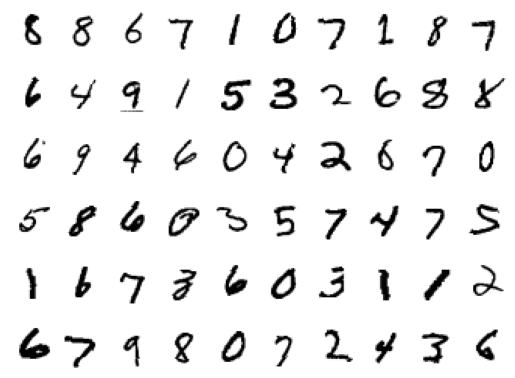

In [6]:
from utils import return_dataset_images

return_dataset_images(train_loader,60)

In [7]:
from model import Net_6,model_train,model_test

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = Net_6().to(device)
Net_6.model_summary(model,(1, 28, 28))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 28, 28]             160
       BatchNorm2d-2           [-1, 16, 28, 28]              32
            Conv2d-3           [-1, 16, 28, 28]           2,320
       BatchNorm2d-4           [-1, 16, 28, 28]              32
           Dropout-5           [-1, 16, 28, 28]               0
         MaxPool2d-6           [-1, 16, 14, 14]               0
            Conv2d-7            [-1, 8, 14, 14]           1,160
       BatchNorm2d-8            [-1, 8, 14, 14]              16
           Dropout-9            [-1, 8, 14, 14]               0
           Conv2d-10            [-1, 8, 14, 14]             584
      BatchNorm2d-11            [-1, 8, 14, 14]              16
          Dropout-12            [-1, 8, 14, 14]               0
        MaxPool2d-13              [-1, 8, 7, 7]               0
           Conv2d-14              

In [8]:
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
#optimizer = optim.Adam(model.parameters(), lr=0.001  , betas=(0.9, 0.99), eps=1e-8, amsgrad=False)
EPOCHS = 15
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    model_train(model, device, train_loader, optimizer, epoch)
    model_test(model, device, test_loader)

EPOCH: 0


Loss=0.02805917151272297 Batch_id=937 Accuracy=94.01: 100%|██████████| 938/938 [00:51<00:00, 18.38it/s]



Test set: Average loss: 0.0530, Accuracy: 9846/10000 (98.46%)

EPOCH: 1


Loss=0.057588789612054825 Batch_id=937 Accuracy=97.52: 100%|██████████| 938/938 [00:48<00:00, 19.44it/s]



Test set: Average loss: 0.0393, Accuracy: 9877/10000 (98.77%)

EPOCH: 2


Loss=0.005860160104930401 Batch_id=937 Accuracy=97.94: 100%|██████████| 938/938 [00:49<00:00, 18.89it/s]



Test set: Average loss: 0.0462, Accuracy: 9862/10000 (98.62%)

EPOCH: 3


Loss=0.016057848930358887 Batch_id=937 Accuracy=98.14: 100%|██████████| 938/938 [00:48<00:00, 19.35it/s]



Test set: Average loss: 0.0319, Accuracy: 9894/10000 (98.94%)

EPOCH: 4


Loss=0.07436377555131912 Batch_id=937 Accuracy=98.34: 100%|██████████| 938/938 [00:51<00:00, 18.14it/s]



Test set: Average loss: 0.0271, Accuracy: 9913/10000 (99.13%)

EPOCH: 5


Loss=0.007166915573179722 Batch_id=937 Accuracy=98.44: 100%|██████████| 938/938 [00:48<00:00, 19.45it/s]



Test set: Average loss: 0.0290, Accuracy: 9902/10000 (99.02%)

EPOCH: 6


Loss=0.0007735384278930724 Batch_id=937 Accuracy=98.53: 100%|██████████| 938/938 [00:49<00:00, 19.11it/s]



Test set: Average loss: 0.0301, Accuracy: 9899/10000 (98.99%)

EPOCH: 7


Loss=0.007165105547755957 Batch_id=937 Accuracy=98.62: 100%|██████████| 938/938 [00:48<00:00, 19.16it/s]



Test set: Average loss: 0.0251, Accuracy: 9926/10000 (99.26%)

EPOCH: 8


Loss=0.0068418970331549644 Batch_id=937 Accuracy=98.67: 100%|██████████| 938/938 [00:47<00:00, 19.63it/s]



Test set: Average loss: 0.0277, Accuracy: 9911/10000 (99.11%)

EPOCH: 9


Loss=0.019518952816724777 Batch_id=937 Accuracy=98.69: 100%|██████████| 938/938 [00:50<00:00, 18.43it/s]



Test set: Average loss: 0.0253, Accuracy: 9916/10000 (99.16%)

EPOCH: 10


Loss=0.02981119230389595 Batch_id=937 Accuracy=98.76: 100%|██████████| 938/938 [00:47<00:00, 19.71it/s]



Test set: Average loss: 0.0233, Accuracy: 9927/10000 (99.27%)

EPOCH: 11


Loss=0.02871677093207836 Batch_id=937 Accuracy=98.71: 100%|██████████| 938/938 [00:48<00:00, 19.16it/s]



Test set: Average loss: 0.0225, Accuracy: 9927/10000 (99.27%)

EPOCH: 12


Loss=0.004677589051425457 Batch_id=937 Accuracy=98.83: 100%|██████████| 938/938 [00:47<00:00, 19.83it/s]



Test set: Average loss: 0.0249, Accuracy: 9919/10000 (99.19%)

EPOCH: 13


Loss=0.003442809684202075 Batch_id=937 Accuracy=98.87: 100%|██████████| 938/938 [00:48<00:00, 19.37it/s]



Test set: Average loss: 0.0243, Accuracy: 9915/10000 (99.15%)

EPOCH: 14


Loss=0.020749898627400398 Batch_id=937 Accuracy=98.88: 100%|██████████| 938/938 [00:49<00:00, 18.98it/s]



Test set: Average loss: 0.0242, Accuracy: 9919/10000 (99.19%)



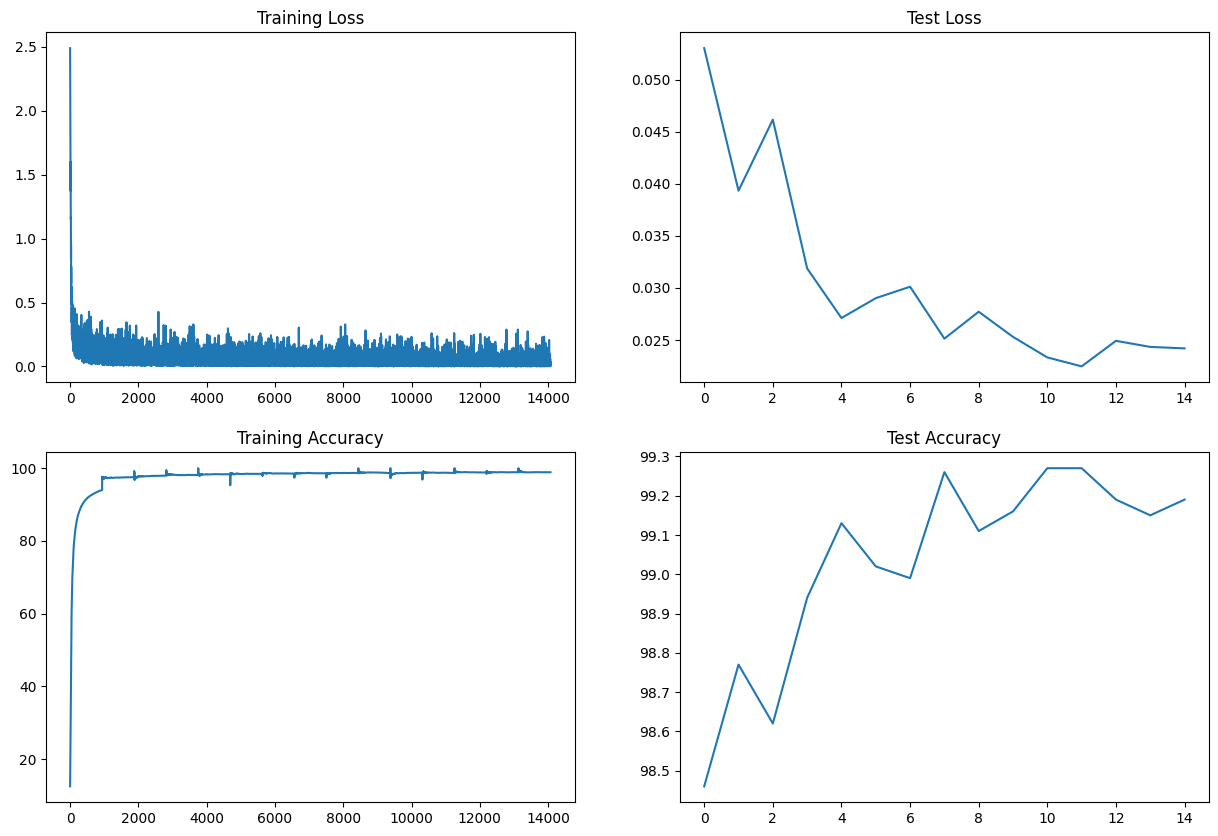

In [9]:
from model import draw_graph

draw_graph()